# Exploring the NLTK book collection and some basic statistical analysis

This notebook is based on the exercises described in [NLTK Book, Chapter 1: Language Processing and Python](https://www.nltk.org/book/ch01.html)
<footer style="text-align:right;font-size:.8em;">Source: Steven Bird, Ewan Klein, and Edward Loper (2009). Natural Language Processing with Python. O’Reilly Media Inc. http://nltk.org/book</footer>

* [NLTK documentation](https://www.nltk.org/)
* [NLTK API Documentaiton](https://www.nltk.org/api/nltk.html)
* [PyCharm](https://www.jetbrains.com/pycharm/download/#section=mac) An Integrated Data Environment (IDE) for working with Python. Has a greater focus on writing python code

## Take a look at the Book Collection

Let's start by taking a look at the downloader and all the tools/packages available.
Then let's download the "book" collection.

***Note:*** **This interface will look significantly different in the browser notebook and a local installation. If you are running the notebook on your computer a separate download GUI may load.**

In [1]:
import nltk
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [1]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [6]:
# look at individual text info.
text1

<Text: Moby Dick by Herman Melville 1851>

We can see this is a special NLTK data type. This is signifanct because it will have it's own unique methods and functions, which we will explore.

In [8]:
type(text1)

nltk.text.Text

### Search text

#### concordance

Concordance is one of the special functions available in the books module.
`concordance` will return a string of results showing all the occurrences of a word and the context in which the word appears. This is also known as a KWIC (Key Word in Context)

In [12]:
text1.concordance('alone')

Displaying 25 of 41 matches:
orance , the letter H , which almost alone maketh the signification of the word
here with its three dismantled masts alone visible ; and an exasperated whale ,
eople had departed , and he was left alone in the place . CHAPTER 10 A Bosom Fr
hapel , I found Queequeg there quite alone ; he having left the Chapel before t
prevail . But Queequeg vowed a vow . Alone in his canoe , he paddled off to a d
s deep itself . The Nantucketer , he alone resides and riots on the sea ; he al
ne resides and riots on the sea ; he alone , in Bible language , goes down to i
here in that uneasy position , stark alone in the cold and dark ; this made me 
avish shore ? But as in landlessness alone resides highest truth , shoreless , 
 hospitable , it is the whale - ship alone to whom the credit will be due ; for
n do , Flask , is to let the old man alone ; never speak to him , whatever he s
e that can possibly succeed , for it alone is practicable . To proceed . BOOK I
n the absen

**Note: The default view is limited to 25 rows but you can change that to show more or less by passing in an integer for the number of lines** `lines=n` 
**Similarly we can dictate the width of the line (in characters):** `width=n`

In [18]:
text1.concordance('death', width=40, lines=10)

Displaying 10 of 90 matches:
TORY OF LIFE AND DEATH ." " The soverei
 to the sport of death the crews repair
 which the wight Death is the only glaz
ever have gone a death - harvesting wit
rs deliriums and death . Abominable are
hough naught but death should part us t
ce Companies pay death - forfeitures up
. Yes , there is death in this business
tter of Life and Death . Methinks that 
an who bleeds to death , for conscience


In [22]:
# Search Multiple Texts 'monstrous' works well
texts = [text1,text2,text5]

for t in texts:
    print (t)
    t.concordance('red',lines=10)
    print('\n')

<Text: Moby Dick by Herman Melville 1851>
Displaying 10 of 40 matches:
t did those aboriginal whalemen , the Red - Men , first sally out in canoes to 
 there . Further on , from the bright red windows of the " Sword - Fish Inn ," 
 Euroclydon ! says old Dives , in his red silken wrapper --( he had a redder on
w Bedford , they bloom like their own red roses . But roses only bloom in summe
ed the chapel with a handsome pair of red worsted man - ropes for this ladder ,
of how this island was settled by the red - men . Thus goes the legend . In old
n the porch of the inn , under a dull red lamp swinging there , that looked muc
 Quohog ! spring , thou chap with the red whiskers ; spring there , Scotch - ca
ists the last remnant of a village of red men , which has long supplied the nei
him from his mood . For , as when the red - cheeked , dancing girls , April and


<Text: Sense and Sensibility by Jane Austen 1811>
Displaying 6 of 6 matches:
n good to the cause , by turning very red and sayi

Find words that are used similarly with the `similar` function. This function will show all of the words that are used in a similar fashion (as determined by NLTK). 

In [24]:
text1.similar('red')

white the his old all rolling every two on other us six patient vast
learned thirty living such first flood


In [25]:
text2.similar('red')

considerable pretty soon much left strong well married amiable made
handsome little interesting deeply talking numerous true stout down
expected


Look at similar ways that similar words are used. `common_contexts` will show when words are used in similar ways.

In [28]:
text2.common_contexts(["red","pretty"])

very_and were_and


In [27]:
text1.common_contexts(['red','white'])

the_heat the_flame the_mass a_arm


### dispersion
see a dispersion plot of the word in the context of the entire text.

note: matplotlib is a python library for plotting and visualizing data. We will look at it more later.

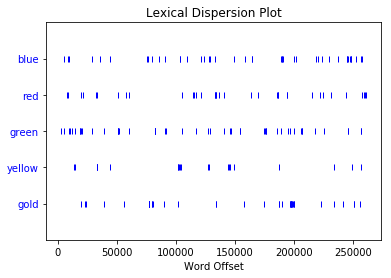

In [33]:
%matplotlib inline
text1.dispersion_plot(['blue','red','green','yellow','gold'])

In [34]:
# take a closer look at an area of the text
text1[150000:210000].count('gold')

16

The word "gold" appears 16 times in this region of the text. 

In [37]:
text1.concordance('gold')

Displaying 25 of 40 matches:
 maples -- long avenues of green and gold . And in August , high in air , the 
ip is moored , offering five hundred gold coins for the apprehension of a parr
lp a flight that paves its rear with gold . Yet when Jonah fairly takes out hi
an seven hundred and seventy - seven gold doubloons ; and so I thought at the 
ith doubly hammered leaves of finest gold , the stumped and paupered arm of ol
e ! d ' ye see this Spanish ounce of gold ?"-- holding up a broad bright coin 
ut speaking , was slowly rubbing the gold piece against the skirts of his jack
plifted in one hand , exhibiting the gold with the other , and with a high rai
ame white whale , he shall have this gold ounce , my boys !" " Huzza ! huzza !
s they hailed the act of nailing the gold to the mast . " It ' s a white whale
the warm waves blush like wine . The gold brow plumbs the blue . The diver sun
s . ' Tis iron -- that I know -- not gold . ' Tis split , too -- that I feel ;
tery world to swim in ,

# Other analysis tools

Find the length of a text, including words, and punctuation, i.e. all tokens.

In [38]:
len(text3)

44764

This is distinct from a word list of all the words that appear in the text (i.e. not inlcuding repeated words.)

In [39]:
sorted(set(text3))

['!',
 "'",
 '(',
 ')',
 ',',
 ',)',
 '.',
 '.)',
 ':',
 ';',
 ';)',
 '?',
 '?)',
 'A',
 'Abel',
 'Abelmizraim',
 'Abidah',
 'Abide',
 'Abimael',
 'Abimelech',
 'Abr',
 'Abrah',
 'Abraham',
 'Abram',
 'Accad',
 'Achbor',
 'Adah',
 'Adam',
 'Adbeel',
 'Admah',
 'Adullamite',
 'After',
 'Aholibamah',
 'Ahuzzath',
 'Ajah',
 'Akan',
 'All',
 'Allonbachuth',
 'Almighty',
 'Almodad',
 'Also',
 'Alvah',
 'Alvan',
 'Am',
 'Amal',
 'Amalek',
 'Amalekites',
 'Ammon',
 'Amorite',
 'Amorites',
 'Amraphel',
 'An',
 'Anah',
 'Anamim',
 'And',
 'Aner',
 'Angel',
 'Appoint',
 'Aram',
 'Aran',
 'Ararat',
 'Arbah',
 'Ard',
 'Are',
 'Areli',
 'Arioch',
 'Arise',
 'Arkite',
 'Arodi',
 'Arphaxad',
 'Art',
 'Arvadite',
 'As',
 'Asenath',
 'Ashbel',
 'Asher',
 'Ashkenaz',
 'Ashteroth',
 'Ask',
 'Asshur',
 'Asshurim',
 'Assyr',
 'Assyria',
 'At',
 'Atad',
 'Avith',
 'Baalhanan',
 'Babel',
 'Bashemath',
 'Be',
 'Because',
 'Becher',
 'Bedad',
 'Beeri',
 'Beerlahairoi',
 'Beersheba',
 'Behold',
 'Bela',
 'Belah

In [40]:
len(set(text3))

2789

We can see that Genesis is made up of 2789 unique tokens.

We can see how ***"lexically rich"*** a text is by dividing the number of words used by the number of words in the text. This will give us an idea of how often words are used in a text. We git a percentage that will indicate what percentage of the words used in the entire text are distince. In other words, does the text use the same words repeatedly, or does it have a rich vocabulary and use many different words through out the text.

This can be a little misleading when thinking about large text. There is a finite vocabulary to introduce into a text, while there is an infinite possibility to a texts length. A text that is 1000 words long and uses only 100 words in its vocabulary, would have the same percentage as a text that is 100,000, but uses a 10,000 word vocabulary. Can we really say that theu both have the same lexical diversity. To make comparisons about lexical diversity the texts need to be of similar lengths. There are other mathematical ways to normalize this value as well and this is where we would like the input of a data scientist.

In [46]:
# This will show that the number of distinct words is just 6% of the total text. 
(len(set(text3))/len(text3)) * 100

6.230453042623537

#### looking at particular words
We can take a closer look at particular words in a text.

In [47]:
text5

<Text: Chat Corpus>

How often does a word appear in a text. Keep in mind we have not done anything to the text, so searching for 'lol', is not the same as searching for ('LOL') in this function.

In [49]:
text5.count('lol')

704

In [50]:
# This will show us that 'lol' is used in 1.5% of the text.
text5.count('lol')/len(text5) *100

1.5640968673628082

But we missed some LOLs... (lol)

In [52]:

text5.count('LOL')

87

We can save our self some time by turning these into reusable functions.

In [53]:
def lex_div(text):
    return (len(set(text))/len(text)) * 100
    
def wrd_freq(text,word):
    return text.count(word)/len(text) *100

In [54]:
lex_div(text5)

13.477005109975563

In [55]:
wrd_freq(text5,'lol')

1.5640968673628082

In [56]:
# create a function to find and return all the locations in the text of a particular word.
def find(word,text):
    for x in range(len(text)):
        if text[x] == word:
            print (word + ': ' + str(x))



In [57]:
find('Ishmael',text1)

Ishmael: 4714
Ishmael: 7707
Ishmael: 7757
Ishmael: 7924
Ishmael: 8247
Ishmael: 20840
Ishmael: 28008
Ishmael: 34715
Ishmael: 40104
Ishmael: 40124
Ishmael: 41684
Ishmael: 83497
Ishmael: 87791
Ishmael: 91358
Ishmael: 91600
Ishmael: 160251
Ishmael: 205305
Ishmael: 205369
Ishmael: 205405


In [58]:
text1.concordance('Ishmael')

Displaying 20 of 20 matches:
SONG . CHAPTER 1 Loomings . Call me Ishmael . Some years ago -- never mind how 
ED STATES . " WHALING VOYAGE BY ONE ISHMAEL . " BLOODY BATTLE IN AFFGHANISTAN .
f silver ,-- So , wherever you go , Ishmael , said I to myself , as I stood in 
de to lodge for the night , my dear Ishmael , be sure to inquire the price , an
nkling glasses within . But go on , Ishmael , said I at last ; don ' t you hear
g and teeth - gnashing there . Ha , Ishmael , muttered I , backing out , Wretch
emen who had gone before me . Yes , Ishmael , the same fate may be thine . But 
 ? thought I . Do you suppose now , Ishmael , that the magnanimous God of heave
l , which , if left to myself , I , Ishmael , should infallibly light upon , fo
 Bildad . Now then , my young man , Ishmael ' s thy name , didn ' t ye say ? We
say ? Well then , down ye go here , Ishmael , for the three hundredth lay ." " 
why don ' t you speak ? It ' s I -- Ishmael ." But all remained still as before
l fear ! CH

In [64]:
print(" ".join(text1[4712:4750]))

Call me Ishmael . Some years ago -- never mind how long precisely -- having little or no money in my purse , and nothing particular to interest me on shore , I thought I would sail about


#### putting words into lists.

In [65]:
# the first sentence of Moby Dick
sent = text1[4712:4716]
sent

['Call', 'me', 'Ishmael', '.']

In [66]:
text1[1]

'Moby'

In [67]:
#we can apply our function for lexical diversity to a list as well. 
# Every word will be uniques so we should get a 100%
lex_div(sent)

100.0

In [68]:
# a few sentences are predefined with the book collection we imported. sent1-sent9
sent1, sent2, sent3

(['Call', 'me', 'Ishmael', '.'],
 ['The',
  'family',
  'of',
  'Dashwood',
  'had',
  'long',
  'been',
  'settled',
  'in',
  'Sussex',
  '.'],
 ['In',
  'the',
  'beginning',
  'God',
  'created',
  'the',
  'heaven',
  'and',
  'the',
  'earth',
  '.'])

In [69]:
type(sent2)

list

Create a list and try using some of the functions we used earlier on it.

In [70]:
sen1 = ['It','is','only','a','scratch','!']

In [71]:
list(set(sen1))

['scratch', 'It', 'a', 'is', '!', 'only']

In [73]:
set(sen1)

{'!', 'It', 'a', 'is', 'only', 'scratch'}

In [74]:
len(sen1)

6

In [75]:
sen1.count('scratch')

1

we can use python addition operators on lists as well.

In [76]:
sen2 = ['I','did','not'] + ['vote','for','you']
sen2

['I', 'did', 'not', 'vote', 'for', 'you']

I forgot the period append will add an item to the end of a list.

In [78]:
# add a period to the end of the list
sen2.append('.')

In [79]:
sen2

['I', 'did', 'not', 'vote', 'for', 'you', '.', '.']

##### List index
every item in a list has an index number associated with it. The index starts at 0, so to find the first item in a list we can refer to the index position '0'

In [80]:
sen1[0]

'It'

We can also do the reverse and get the index position of a word in the list.

In [81]:
sen1.index('scratch')

4

In [82]:
sen1[4]

'scratch'

To get more than one item from the list we can use : notation to indicate a span of the list.

In [83]:
text1[4712:4716]

['Call', 'me', 'Ishmael', '.']

In [84]:
# to start from the beginning we do not need to refer to the index
text1[:8]

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']']

In [85]:
# or the end
text1[260800:]

['-',
 'cruising',
 'Rachel',
 ',',
 'that',
 'in',
 'her',
 'retracing',
 'search',
 'after',
 'her',
 'missing',
 'children',
 ',',
 'only',
 'found',
 'another',
 'orphan',
 '.']

In [87]:
# The entire text
text1[:]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.',
 '(',
 'Supplied',
 'by',
 'a',
 'Late',
 'Consumptive',
 'Usher',
 'to',
 'a',
 'Grammar',
 'School',
 ')',
 'The',
 'pale',
 'Usher',
 '--',
 'threadbare',
 'in',
 'coat',
 ',',
 'heart',
 ',',
 'body',
 ',',
 'and',
 'brain',
 ';',
 'I',
 'see',
 'him',
 'now',
 '.',
 'He',
 'was',
 'ever',
 'dusting',
 'his',
 'old',
 'lexicons',
 'and',
 'grammars',
 ',',
 'with',
 'a',
 'queer',
 'handkerchief',
 ',',
 'mockingly',
 'embellished',
 'with',
 'all',
 'the',
 'gay',
 'flags',
 'of',
 'all',
 'the',
 'known',
 'nations',
 'of',
 'the',
 'world',
 '.',
 'He',
 'loved',
 'to',
 'dust',
 'his',
 'old',
 'grammars',
 ';',
 'it',
 'somehow',
 'mildly',
 'reminded',
 'him',
 'of',
 'his',
 'mortality',
 '.',
 '"',
 'While',
 'you',
 'take',
 'in',
 'hand',
 'to',
 'school',
 'others',
 ',',
 'and',
 'to',
 'teach',
 'them',
 'by',
 'what',
 'name',
 'a',
 'whale',
 '-',
 'fish',
 'is',
 'to',
 'be',
 

Finally we can recreate the original string (sentence).

In [88]:
string1 = " ".join(sen1)
string1

'It is only a scratch !'

Also note that strings also can take some of the functions we have been using.

In [89]:
len(string1)

22

In [90]:
string1[0]

'I'

In [91]:
string1[:6]

'It is '

## Bringing in some Statistics and Math

### Frequency Distribution

We can use this method to determine the importance of words. The idea being that words used more frequently will be more important. `FreqDist` will create an index of all the words used in the text (samples) and record how many times each word, or sample, appears in the text. 

In [94]:
from nltk.probability import FreqDist
fq_dis1 =FreqDist(text1)
print(fq_dis1)

<FreqDist with 19317 samples and 260819 outcomes>


That is a large collection, 19317 samples. Looking at it all is daunting but do we really need to see all of it.

Note: Outcomes should equal the number of tokens in the text. `len(text1)` Let's check.


In [95]:
len(text1)

260819

In [96]:
# this will show us the words used most frequently. We can choose the range.
# so to see the top 50 we sue:
fq_dis1.most_common(50)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624)]

In [97]:
# find the frequency of a particular word:
fq_dis1['Ishmael']

19

In [105]:
# see the frequency of a word. 
fq_dis1.freq('Ishmael')

7.284745359808909e-05

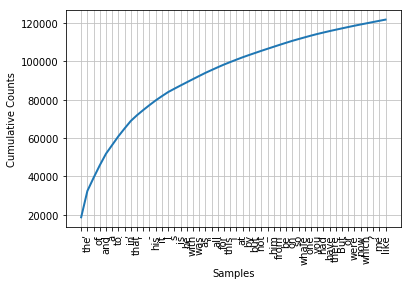

In [98]:
# plot the frequency distribution:
fq_dis1.plot(50, cumulative=True)

A lot of these words are not helpful in understanding the text. "whale" might be the only telling word in our frequency distribution. You can also look at the **hapaxes** or the words that only appear once to see if these are more insightful.

In [99]:
fq_dis1.hapaxes()

['Herman',
 'Melville',
 ']',
 'ETYMOLOGY',
 'Late',
 'Consumptive',
 'School',
 'threadbare',
 'lexicons',
 'mockingly',
 'flags',
 'mortality',
 'signification',
 'HACKLUYT',
 'Sw',
 'HVAL',
 'roundness',
 'Dut',
 'Ger',
 'WALLEN',
 'WALW',
 'IAN',
 'RICHARDSON',
 'KETOS',
 'GREEK',
 'CETUS',
 'LATIN',
 'WHOEL',
 'ANGLO',
 'SAXON',
 'WAL',
 'HWAL',
 'SWEDISH',
 'ICELANDIC',
 'BALEINE',
 'BALLENA',
 'FEGEE',
 'ERROMANGOAN',
 'Librarian',
 'painstaking',
 'burrower',
 'grub',
 'Vaticans',
 'stalls',
 'higgledy',
 'piggledy',
 'gospel',
 'promiscuously',
 'commentator',
 'belongest',
 'sallow',
 'Pale',
 'Sherry',
 'loves',
 'bluntly',
 'Subs',
 'thankless',
 'Hampton',
 'Court',
 'hie',
 'refugees',
 'pampered',
 'Michael',
 'Raphael',
 'unsplinterable',
 'GENESIS',
 'JOB',
 'JONAH',
 'punish',
 'ISAIAH',
 'soever',
 'cometh',
 'incontinently',
 'perisheth',
 'PLUTARCH',
 'MORALS',
 'breedeth',
 'Whirlpooles',
 'Balaene',
 'arpens',
 'PLINY',
 'Scarcely',
 'TOOKE',
 'LUCIAN',
 'TRUE',


The rare words don't offer much insight either, in this case. It looks like we will need to be more selective of what words in the text we want to consider.

### long words

Can we glean anything from looking at the longer words in the text. In python this is written: `word for word in words if len(word)>n` where `n` is the word length we want to examine.

In [100]:
# removing duplicates first by creating a set of the text. 
# Our iteration returns a list and so our result will return duplicates if they exist. 
# We should also put the list into a set to remove duplicates.

words_10 = set([word for word in text1 if len(word) > 10])
sorted(words_10)

['AFFGHANISTAN',
 'APPLICATION',
 'APPROACHING',
 'Accordingly',
 'Advancement',
 'Aldrovandus',
 'Alleghanian',
 'Alleghanies',
 'Ambergriese',
 'Archipelagoes',
 'Asphaltites',
 'Bartholomew',
 'Basilosaurus',
 'Bibliographical',
 'Biographical',
 'Brighggians',
 'CIRCUMNAVIGATION',
 'CONVERSATIONS',
 'Californian',
 'Capricornus',
 'Champollion',
 'Charlemagne',
 'Christendom',
 'Christianity',
 'Circumambulate',
 'Commonwealth',
 'Congregation',
 'Congregational',
 'Connecticut',
 'Consequently',
 'Considering',
 'Constantine',
 'Constantinople',
 'Consumptive',
 'Conversation',
 'Convulsively',
 'Corinthians',
 'Corresponding',
 'Counterpane',
 'DUODECIMOES',
 'Dardanelles',
 'Decapitation',
 'Deliberately',
 'Deuteronomy',
 'Dunfermline',
 'Duodecimoes',
 'ERROMANGOAN',
 'Ecclesiastes',
 'Ehrenbreitstein',
 'Ellenborough',
 'Emblazonings',
 'Erromanggoans',
 'Evangelists',
 'Expeditions',
 'Furthermore',
 'Greenlanders',
 'Greenlandmen',
 'Guernseyman',
 'HARPOONEERS',
 'Hardican

Interesting but still not very insightful. However with other texts this might not be the case. look at other texts and see if the word length reveals anything. 

In [101]:
words_15 = set([word for word in text5 if len(word) > 15])
sorted(words_15)

['!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '#talkcity_adults',
 '(((((((((((((((((',
 '((((((((((((((((((',
 '((((((((((((((((((((',
 '(((((((((((((((((((((',
 '(((((((((((((((((((((((',
 '((((((((((((((((((((((((',
 '(((((((((((((((((((((((((',
 '((((((((((((((((((((((((((',
 ')))))))))))))))))',
 ')))))))))))))))))))',
 ')))))))))))))))))))))',
 '))))))))))))))))))))))',
 '))))))))))))))))))))))))))))',
 ')))))))))))))))))))))))))))))))',
 '--------------------',
 '.(..(.vMp3 v1.7.4.).)',
 '.(..(.vMp3 vi.p.t.)..).',
 '................',
 '..................',
 '...................',
 '....................',
 '........................',
 '..............................',
 '.A.n.a.c.?.n.?.a.',
 '//www.wunderground.com/cgi-bin/findweather/getForecast?query=95953#FIR',
 '<3333333333333333',
 '<33333333333333333',
 'BAAAAALLLLLLLLIII

In [102]:
words_15 = set([word for word in text4 if len(word) > 10])
sorted(words_15)

['Abandonment',
 'Administered',
 'Administration',
 'Administrations',
 'Afghanistan',
 'Agriculture',
 'Alleghanies',
 'Americanism',
 'Appreciating',
 'Apprehension',
 'Arbitration',
 'Association',
 'Bicentennial',
 'COOPERATION',
 'Christianity',
 'Commendable',
 'Commissioners',
 'Commonwealth',
 'Communications',
 'Confederacy',
 'Confederation',
 'Confidently',
 'Congressional',
 'Congressman',
 'Considering',
 'Constitution',
 'Constitutional',
 'Contemplating',
 'Corporations',
 'Declaration',
 'Departments',
 'Destructive',
 'Discouraging',
 'ENFORCEMENT',
 'Encountering',
 'Encouraging',
 'Enterprises',
 'Establishment',
 'Expenditure',
 'Experiencing',
 'Federalists',
 'Fortunately',
 'Governments',
 'Guadalcanal',
 'INVESTIGATION',
 'Inauguration',
 'Inconsiderable',
 'Independence',
 'Independently',
 'Information',
 'Instinctively',
 'Intelligence',
 'International',
 'Legislation',
 'Legislature',
 'Massachusetts',
 'Mediterranean',
 'Mischievous',
 'Mississippi',
 'No

Now we can combine these features (frequency distribution and word length) to get another look into the text. Let's try the chat text and find words that are 8 characters or longer and are found more than 5 times.

In [103]:
fq_dis5=FreqDist(text5)
sorted(word for word in set(text5) if len(word) > 8 and fq_dis5[word] >5)


['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 ')))))))))))',
 ')))))))))))))',
 '.........',
 'Compliments',
 'cute.-ass',
 'everybody',
 'everything',
 'listening',
 'seriously',
 'something',
 'sometimes']

What words was used the most in texts?

In [107]:
# warning this will be dissapointing
fq_dis5.max()

'.'

In [ ]:
fq_dis5.plot(50, cumulative=True)

## Bigrams and collocation
**Collocation** is a sequence of words that occur together with some frequency that is statistically significant. We also want to focus on collocation that has meaning. e.g. 'dark chocolate' and not 'the chocolate'

**Bigram** is a a pair of consecutive words, e.g. "hot tub". 

For bigrams we have a function in NLTK. the bigrams function takes a Python list evaluates it as word pairs. We can then store the bigrams in a list.

In [108]:
from nltk import bigrams
bgram = list(bigrams(['more', 'is', 'said', 'than', 'done']))

In [109]:
bgram

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

In [110]:
#we can get all of the bigrams for a text:
list(set(bigrams(text1)))

[('far', 'apparently'),
 ('Indian', 'hunters'),
 ('Sam', 'got'),
 ('vessels', 'at'),
 ('the', 'ragged'),
 ('white', 'sea'),
 ('his', 'cattle'),
 ('their', 'hidden'),
 ('fin', 'stands'),
 ('great', 'man'),
 ('fin', '.'),
 ('is', 'even'),
 ('ship', 'having'),
 ('meanly', 'and'),
 ('your', 'day'),
 ('only', 'serving'),
 ('Human', 'or'),
 ('Had', 'the'),
 ('not', 'unvexed'),
 ('never', 'shake'),
 ('an', 'opium'),
 ('Not', 'wholly'),
 ('satirical', ','),
 ('human', 'mothers'),
 ('internal', 'structure'),
 ('head', '--'),
 ('it', 'bore'),
 ('twice', 'sundering'),
 ('especially', 'would'),
 ('great', 'swallow'),
 ('slightly', 'tapping'),
 ('All', 'silence'),
 ('though', 'idiotic'),
 ('his', 'filed'),
 ('dog', 'look'),
 ('same', 'strangely'),
 ('STRING', 'OF'),
 ('was', 'near'),
 ('majestic', 'flukes'),
 (',', 'ma'),
 ('Dutch', 'and'),
 ('the', 'minced'),
 ('tornadoes', 'that'),
 ('carriage', 'ashore'),
 ('suicide', ','),
 ('whole', 'lives'),
 ('touching', 'at'),
 ('was', 'freely'),
 ('Hogarth

This is where collocation is useful. The collocation function will essentially give us a list of bigrams that are statistically relevant because the collocations contain rare words that appear with other words at a higher frequency than is statistically expected. This is basically the same thing we did earlier to create bigrams but it is a function of the book module.

In [112]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


In [113]:
# reminder: text8 are the Personals
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


### Other ways of Counting

We can also Count the words based on word length. 

In [117]:
#first get a list that contains all the words' length.
ls = [len(word) for word in text1]
print(ls)

[1, 4, 4, 2, 6, 8, 4, 1, 9, 1, 1, 8, 2, 1, 4, 11, 5, 2, 1, 7, 6, 1, 3, 4, 5, 2, 10, 2, 4, 1, 5, 1, 4, 1, 3, 5, 1, 1, 3, 3, 3, 1, 2, 3, 4, 7, 3, 3, 8, 3, 8, 1, 4, 1, 5, 12, 1, 9, 11, 4, 3, 3, 3, 5, 2, 3, 3, 5, 7, 2, 3, 5, 1, 2, 5, 2, 4, 3, 3, 8, 1, 2, 7, 6, 8, 3, 2, 3, 9, 1, 1, 5, 3, 4, 2, 4, 2, 6, 6, 1, 3, 2, 5, 4, 2, 4, 4, 1, 5, 1, 4, 2, 2, 2, 6, 2, 3, 6, 7, 3, 1, 7, 9, 1, 3, 6, 1, 1, 5, 6, 5, 6, 3, 13, 2, 3, 4, 1, 3, 7, 4, 5, 2, 3, 4, 2, 2, 8, 1, 5, 1, 3, 2, 1, 3, 3, 1, 4, 1, 4, 6, 2, 5, 4, 9, 2, 7, 1, 3, 2, 3, 1, 5, 2, 6, 2, 7, 2, 2, 7, 1, 1, 10, 1, 5, 1, 3, 2, 2, 4, 11, 4, 3, 3, 1, 3, 3, 1, 6, 1, 1, 1, 1, 1, 4, 1, 3, 1, 2, 4, 1, 2, 6, 2, 2, 10, 1, 1, 10, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 6, 1, 3, 1, 5, 1, 4, 1, 7, 1, 5, 1, 9, 1, 5, 1, 7, 1, 7, 1, 6, 1, 7, 1, 7, 1, 5, 1, 4, 1, 4, 1, 5, 1, 5, 1, 4, 1, 4, 1, 11, 1, 8, 1, 8, 2, 1, 3, 1, 3, 1, 9, 2, 2, 4, 2, 4, 4, 4, 4, 11, 8, 3, 4, 1, 4, 2, 1, 4, 5, 2, 1, 3, 1, 3, 7, 2, 4, 4, 7, 3, 4, 8, 3, 6, 1, 6, 2, 3, 5, 1, 7, 2, 8, 6

In [118]:
#now get the freq distribution of that list:
fq_dist_wordlength = FreqDist(ls)

In [119]:
fq_dist_wordlength

FreqDist({1: 47933,
          2: 38513,
          3: 50223,
          4: 42345,
          5: 26597,
          6: 17111,
          7: 14399,
          8: 9966,
          9: 6428,
          10: 3528,
          11: 1873,
          12: 1053,
          13: 567,
          14: 177,
          15: 70,
          16: 22,
          17: 12,
          18: 1,
          20: 1})

In [120]:
# look at the distribution with the highest frequnecy
fq_dist_wordlength.max()

3

In [121]:
fq_dist_wordlength[3]

50223

In [122]:
# What is the top 10
fq_dist_wordlength.most_common(10)

[(3, 50223),
 (1, 47933),
 (4, 42345),
 (2, 38513),
 (5, 26597),
 (6, 17111),
 (7, 14399),
 (8, 9966),
 (9, 6428),
 (10, 3528)]

In [123]:
# what is the percentage of frequency of 3 letter words?
fq_dist_wordlength.freq(3) * 100

19.255882431878046

In [125]:
# get the total number of samples
# again this should be the same as the word count of the text.
fq_dist_wordlength.N() == len(text1)

True

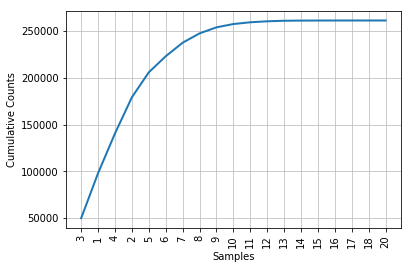

In [126]:
fq_dist_wordlength.plot(cumulative=True)

### some quick observations



#### additional Word (string data types) operators 
`s.startswith(t)`	test if s starts with t

`s.endswith(t)`	test if s ends with t

`t in s`	test if t is a substring of s

`s.islower()`	test if s contains cased characters and all are lowercase

`s.isupper()`	test if s contains cased characters and all are uppercase

`s.isalpha()`	test if s is non-empty and all characters in s are alphabetic

`s.isalnum()`	test if s is non-empty and all characters in s are alphanumeric

`s.isdigit()`	test if s is non-empty and all characters in s are digits

`s.istitle()`	test if s contains cased characters and is titlecased (i.e. all words in s have initial capitals)

In [127]:
#quick examples:
word = "hello2"
word.startswith('h')

True

In [128]:
word.endswith('e')

False

In [129]:
word.endswith('lo2')

True

In [130]:
word2 = 'hell'
word2 in word

True

In [131]:
word.islower()

True

In [132]:
word.isalpha()

False

In [ ]:
word.isalnum()

In [ ]:
num='839'
num.isalnum()

In [ ]:
num.isalnum()

In [ ]:
word3 = "Alvid"
word3.istitle()

In [ ]:
word3.isdigit()

In [ ]:
num.isdigit()

In [ ]:
# find hyphenated words with specific text
sorted(w for w in set(text7) if '-' in w and 'down' in w)

In [ ]:
# search for variations of a words:
sorted(w for w in set(text1) if w.startswith('run') or w.startswith('ran'))


In [ ]:
#find all upper case words:
[word.upper() for word in text1]